# 🔍 AIOps Log Monitoring & Failure Detection - Data Visualization
## Comprehensive Analysis of System Events and Logs

This notebook provides detailed visualizations and insights from the AIOps monitoring dataset, 
analyzing system events, errors, and performance metrics.

## PART 1: SETUP AND DATA LOADING
## ===============================



### 1.1 Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set up visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


### 1.2 Load Dataset from Kaggle

In [2]:

# Install required package if needed
# !pip install kagglehub

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the dataset
print("📂 Loading dataset from Kaggle...")
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "expertshubham/aiops-log-monitoring-and-failure-detection-dataset",
    "processed_events_analysis.csv"
)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Dataset Shape: {df.shape}")
print(f"📊 Total Events: {len(df)}")
print(f"📊 Columns: {df.columns.tolist()}")

# Display first few rows
print("\n🔍 First 5 rows of data:")
display(df.head())


📂 Loading dataset from Kaggle...
✅ Dataset loaded successfully!
📊 Dataset Shape: (1746, 35)
📊 Total Events: 1746
📊 Columns: ['received_at', 'environment', 'project', 'event_count', 'schema_version', 'sdk_version', 'event_type', 'category', 'severity', 'status', 'timestamp', 'hostname', 'os', 'os_version', 'python_version', 'region', 'app_version', 'instance_id', 'process_id', 'trace_id', 'message', 'file', 'line', 'logger_name', 'level', 'method', 'path', 'status_code', 'duration_ms', 'hour', 'date', 'day_of_week', 'month', 'week', 'day']

🔍 First 5 rows of data:


,received_at,environment,project,event_count,schema_version,sdk_version,event_type,category,severity,status,...,method,path,status_code,duration_ms,hour,date,day_of_week,month,week,day
0,2026-02-20T13:00:53.883351,production,client-test-app,2,1.0,2.0.0,LOG,APPLICATION,HIGH,FAILURE,...,NaN,NaN,NaN,NaN,13,2026-02-20,Friday,2,8,20
1,2026-02-20T13:00:53.883351,production,client-test-app,2,1.0,2.0.0,INCOMING_REQUEST,APPLICATION,LOW,SUCCESS,...,GET,/log-error,200.0,0.0,13,2026-02-20,Friday,2,8,20
2,2026-02-20T13:04:48.940264,production,client-test-app,3,1.0,2.0.0,LOG,APPLICATION,HIGH,FAILURE,...,NaN,NaN,NaN,NaN,13,2026-02-20,Friday,2,8,20
3,2026-02-20T13:04:48.940264,production,client-test-app,3,1.0,2.0.0,SERVER_ERROR,APPLICATION,LOW,FAILURE,...,NaN,NaN,NaN,NaN,13,2026-02-20,Friday,2,8,20
4,2026-02-20T13:04:48.940264,production,client-test-app,3,1.0,2.0.0,SERVER_ERROR,APPLICATION,LOW,FAILURE,...,NaN,NaN,NaN,NaN,13,2026-02-20,Friday,2,8,20


### 1.3 Data Overview and Preprocessing

In [3]:
# Convert timestamp columns to datetime if they're not already
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.day_name()
    df['month'] = df['timestamp'].dt.month
    df['week'] = df['timestamp'].dt.isocalendar().week

# Basic dataset information
print("📊 Dataset Info:")
print("-" * 50)
print(f"Total Records: {len(df):,}")
print(f"Date Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Unique Event Types: {df['event_type'].nunique()}")
print(f"Unique Hosts: {df['hostname'].nunique()}")
print(f"Unique Projects: {df['project'].nunique()}")

print("\n📊 Missing Values:")
print("-" * 50)
missing_data = df.isnull().sum()[df.isnull().sum() > 0]
if len(missing_data) > 0:
    print(missing_data)
else:
    print("No missing values found")

print("\n📊 Data Types:")
print("-" * 50)
print(df.dtypes)


📊 Dataset Info:
--------------------------------------------------
Total Records: 1,746
Date Range: 2026-02-20 13:00:52.589492+00:00 to 2026-02-21 06:02:26.364315+00:00
Unique Event Types: 9
Unique Hosts: 1
Unique Projects: 1

📊 Missing Values:
--------------------------------------------------
message        1677
file           1677
line           1677
logger_name    1677
level          1677
method         1202
path           1202
status_code    1202
duration_ms    1202
dtype: int64

📊 Data Types:
--------------------------------------------------
received_at                       str
environment                       str
project                           str
event_count                     int64
schema_version                float64
sdk_version                       str
event_type                        str
category                          str
severity                          str
status                            str
timestamp         datetime64[us, UTC]
hostname                   

## PART 2: EVENT DISTRIBUTION ANALYSIS
## ====================================

### 2.1 Event Type Distribution

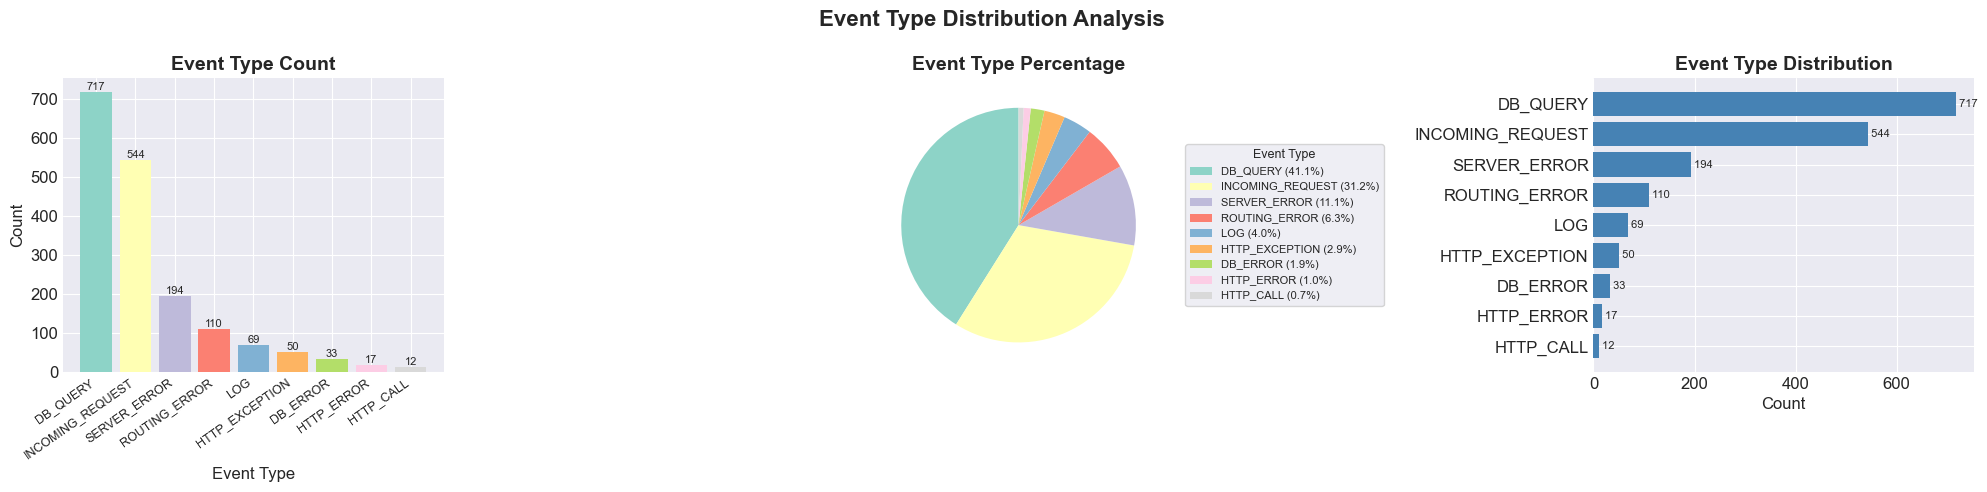

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Event Type Distribution Analysis', fontsize=16, fontweight='bold')

event_counts = df['event_type'].value_counts()
colors = plt.cm.Set3(range(len(event_counts)))

# 🔵 1. Vertical Bar Chart
ax1 = axes[0]
bars1 = ax1.bar(event_counts.index, event_counts.values, color=colors)

ax1.set_title('Event Type Count')
ax1.set_xlabel('Event Type')
ax1.set_ylabel('Count')

ax1.set_xticklabels(event_counts.index, rotation=35, ha='right', fontsize=9)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=8)


# 🔵 2. Pie Chart
ax2 = axes[1]

wedges, _ = ax2.pie(
    event_counts.values,
    colors=colors,
    startangle=90
)

ax2.set_title('Event Type Percentage')

# legend with percentage
total = event_counts.sum()
legend_labels = [
    f"{name} ({count/total*100:.1f}%)"
    for name, count in zip(event_counts.index, event_counts.values)
]

ax2.legend(
    wedges,
    legend_labels,
    title="Event Type",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    fontsize=8,
    title_fontsize=9,
    frameon=True
)


# 🔵 3. Horizontal Bar Chart
ax3 = axes[2]
event_counts_sorted = event_counts.sort_values()

bars3 = ax3.barh(event_counts_sorted.index, event_counts_sorted.values, color='steelblue')

ax3.set_title('Event Type Distribution')
ax3.set_xlabel('Count')

for bar, count in zip(bars3, event_counts_sorted.values):
    ax3.text(count, bar.get_y() + bar.get_height()/2, f' {count:,}', va='center', fontsize=8)

plt.tight_layout()
plt.show()

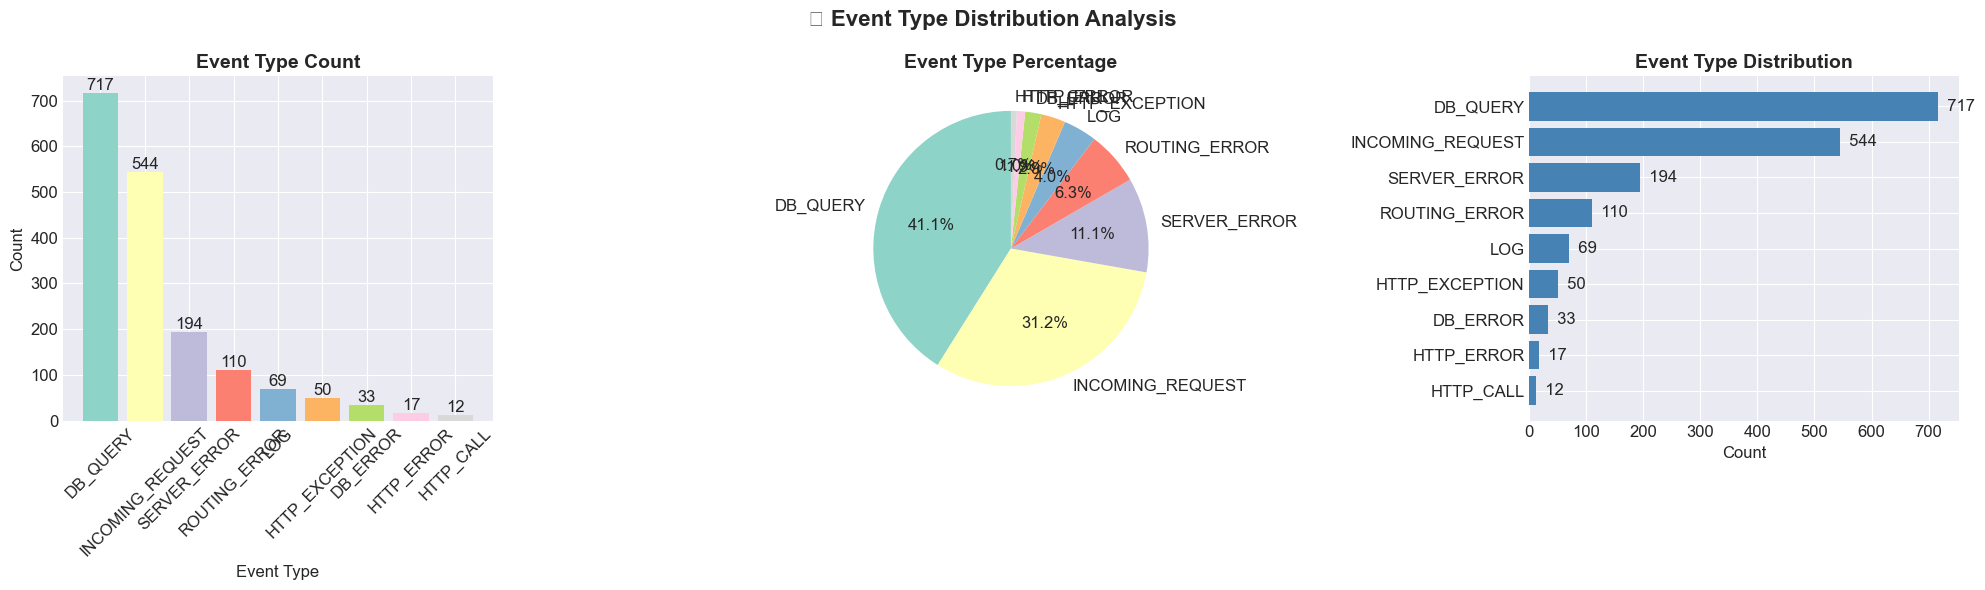


📊 Event Type Summary:
event_type
DB_QUERY            717
INCOMING_REQUEST    544
SERVER_ERROR        194
ROUTING_ERROR       110
LOG                  69
HTTP_EXCEPTION       50
DB_ERROR             33
HTTP_ERROR           17
HTTP_CALL            12


In [4]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('📊 Event Type Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Bar Chart
ax1 = axes[0]
event_counts = df['event_type'].value_counts()
colors = plt.cm.Set3(range(len(event_counts)))
bars1 = ax1.bar(event_counts.index, event_counts.values, color=colors)
ax1.set_title('Event Type Count')
ax1.set_xlabel('Event Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# 2. Pie Chart
ax2 = axes[1]
wedges, texts, autotexts = ax2.pie(event_counts.values, 
                                    labels=event_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90)
ax2.set_title('Event Type Percentage')

# 3. Horizontal Bar for better label visibility
ax3 = axes[2]
event_counts_sorted = event_counts.sort_values()
bars3 = ax3.barh(event_counts_sorted.index, event_counts_sorted.values, color='steelblue')
ax3.set_title('Event Type Distribution')
ax3.set_xlabel('Count')
for i, (bar, count) in enumerate(zip(bars3, event_counts_sorted.values)):
    ax3.text(count, bar.get_y() + bar.get_height()/2, f'  {count:,}', va='center')

plt.tight_layout()
plt.show()

print("\n📊 Event Type Summary:")
print(event_counts.to_string())


### 2.2 Severity Level Analysis

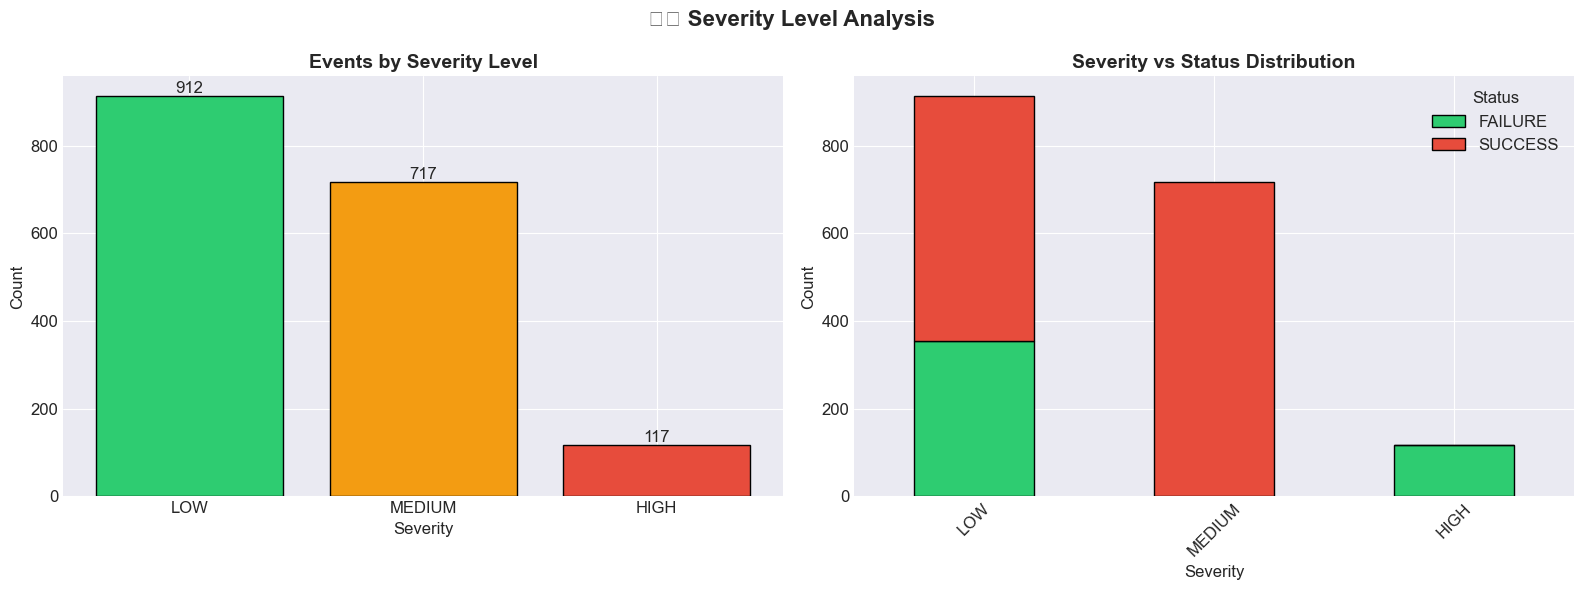


📊 High Severity Events: 117
📊 Critical Severity Events: 0


In [5]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('⚠️ Severity Level Analysis', fontsize=16, fontweight='bold')

# Define severity order and colors
severity_order = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
severity_colors = {'LOW': '#2ecc71', 'MEDIUM': '#f39c12', 
                   'HIGH': '#e74c3c', 'CRITICAL': '#8e44ad'}

# Get severity counts
severity_counts = df['severity'].value_counts()
severity_counts = severity_counts.reindex([s for s in severity_order if s in severity_counts.index])

# 1. Severity Distribution
ax1 = axes[0]
colors = [severity_colors.get(sev, '#3498db') for sev in severity_counts.index]
bars1 = ax1.bar(severity_counts.index, severity_counts.values, color=colors, edgecolor='black')
ax1.set_title('Events by Severity Level')
ax1.set_xlabel('Severity')
ax1.set_ylabel('Count')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# 2. Severity vs Status
ax2 = axes[1]
severity_status = pd.crosstab(df['severity'], df['status'])
severity_status = severity_status.reindex([s for s in severity_order if s in severity_status.index])
severity_status.plot(kind='bar', stacked=True, ax=ax2, 
                     color=['#2ecc71', '#e74c3c'], edgecolor='black')
ax2.set_title('Severity vs Status Distribution')
ax2.set_xlabel('Severity')
ax2.set_ylabel('Count')
ax2.legend(title='Status')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n📊 High Severity Events: {severity_counts.get('HIGH', 0):,}")
print(f"📊 Critical Severity Events: {severity_counts.get('CRITICAL', 0):,}")


### 2.3 Status Distribution & Success Rate

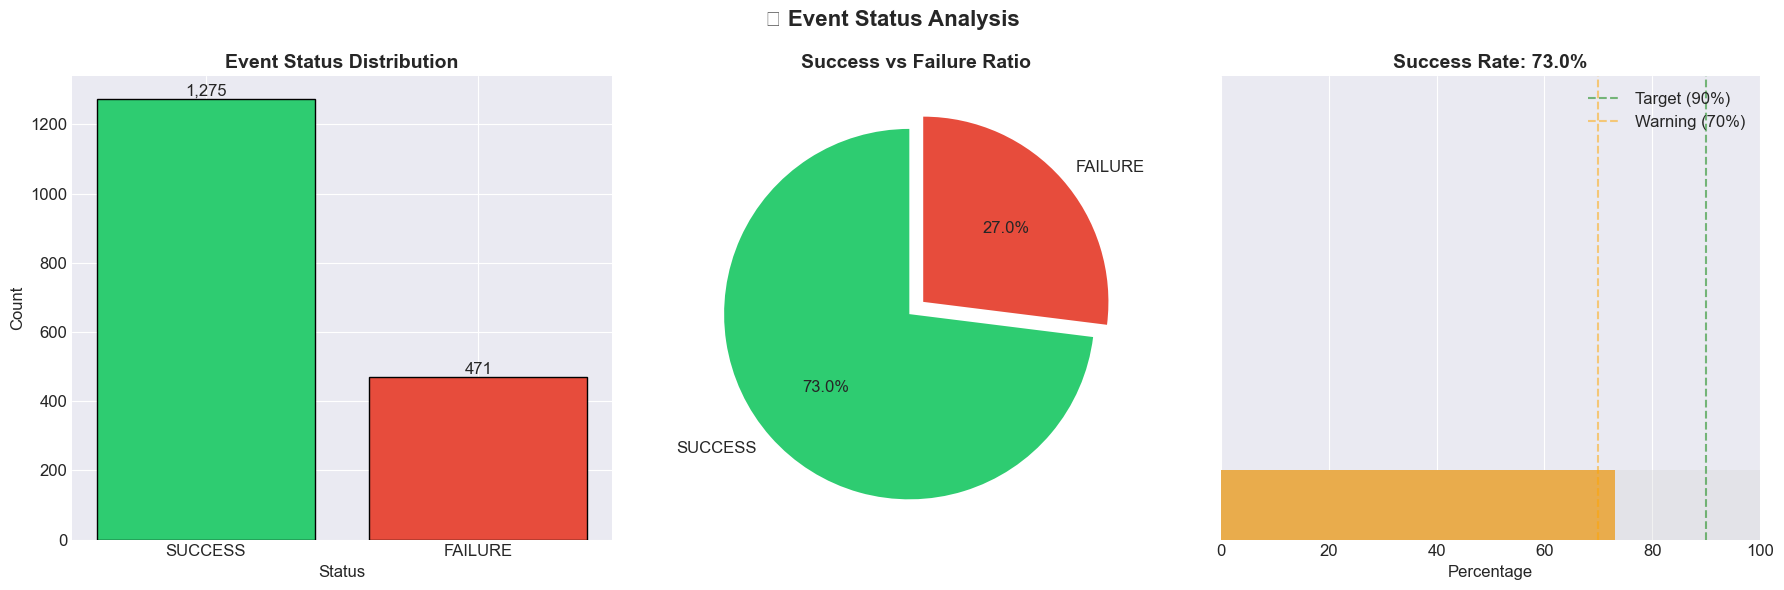


📊 Success Rate: 73.02%
📊 Failure Rate: 26.98%


In [6]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('✅ Event Status Analysis', fontsize=16, fontweight='bold')

# Status counts
status_counts = df['status'].value_counts()
total_events = len(df)

# 1. Status Bar Chart
ax1 = axes[0]
colors = ['#2ecc71' if s == 'SUCCESS' else '#e74c3c' for s in status_counts.index]
bars1 = ax1.bar(status_counts.index, status_counts.values, color=colors, edgecolor='black')
ax1.set_title('Event Status Distribution')
ax1.set_xlabel('Status')
ax1.set_ylabel('Count')
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# 2. Success/Failure Pie Chart
ax2 = axes[1]
success_count = status_counts.get('SUCCESS', 0)
failure_count = status_counts.get('FAILURE', 0)
if success_count + failure_count > 0:
    wedges, texts, autotexts = ax2.pie([success_count, failure_count],
                                        labels=['SUCCESS', 'FAILURE'],
                                        autopct='%1.1f%%',
                                        colors=['#2ecc71', '#e74c3c'],
                                        explode=(0.05, 0.05),
                                        startangle=90)
    ax2.set_title('Success vs Failure Ratio')

# 3. Success Rate Gauge
ax3 = axes[2]
success_rate = (success_count / total_events * 100) if total_events > 0 else 0

# Create a simple gauge chart
ax3.set_xlim(0, 100)
ax3.set_ylim(0, 1)
ax3.barh(0, success_rate, height=0.3, color='#2ecc71' if success_rate > 90 else '#f39c12' if success_rate > 70 else '#e74c3c')
ax3.barh(0, 100, height=0.3, color='lightgray', alpha=0.3, left=0)
ax3.set_title(f'Success Rate: {success_rate:.1f}%')
ax3.set_yticks([])
ax3.set_xlabel('Percentage')

# Add threshold lines
ax3.axvline(x=90, color='green', linestyle='--', alpha=0.5, label='Target (90%)')
ax3.axvline(x=70, color='orange', linestyle='--', alpha=0.5, label='Warning (70%)')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"\n📊 Success Rate: {success_rate:.2f}%")
print(f"📊 Failure Rate: {100 - success_rate:.2f}%")


## PART 3: TIME SERIES ANALYSIS
## ============================

### 3.1 Events Timeline

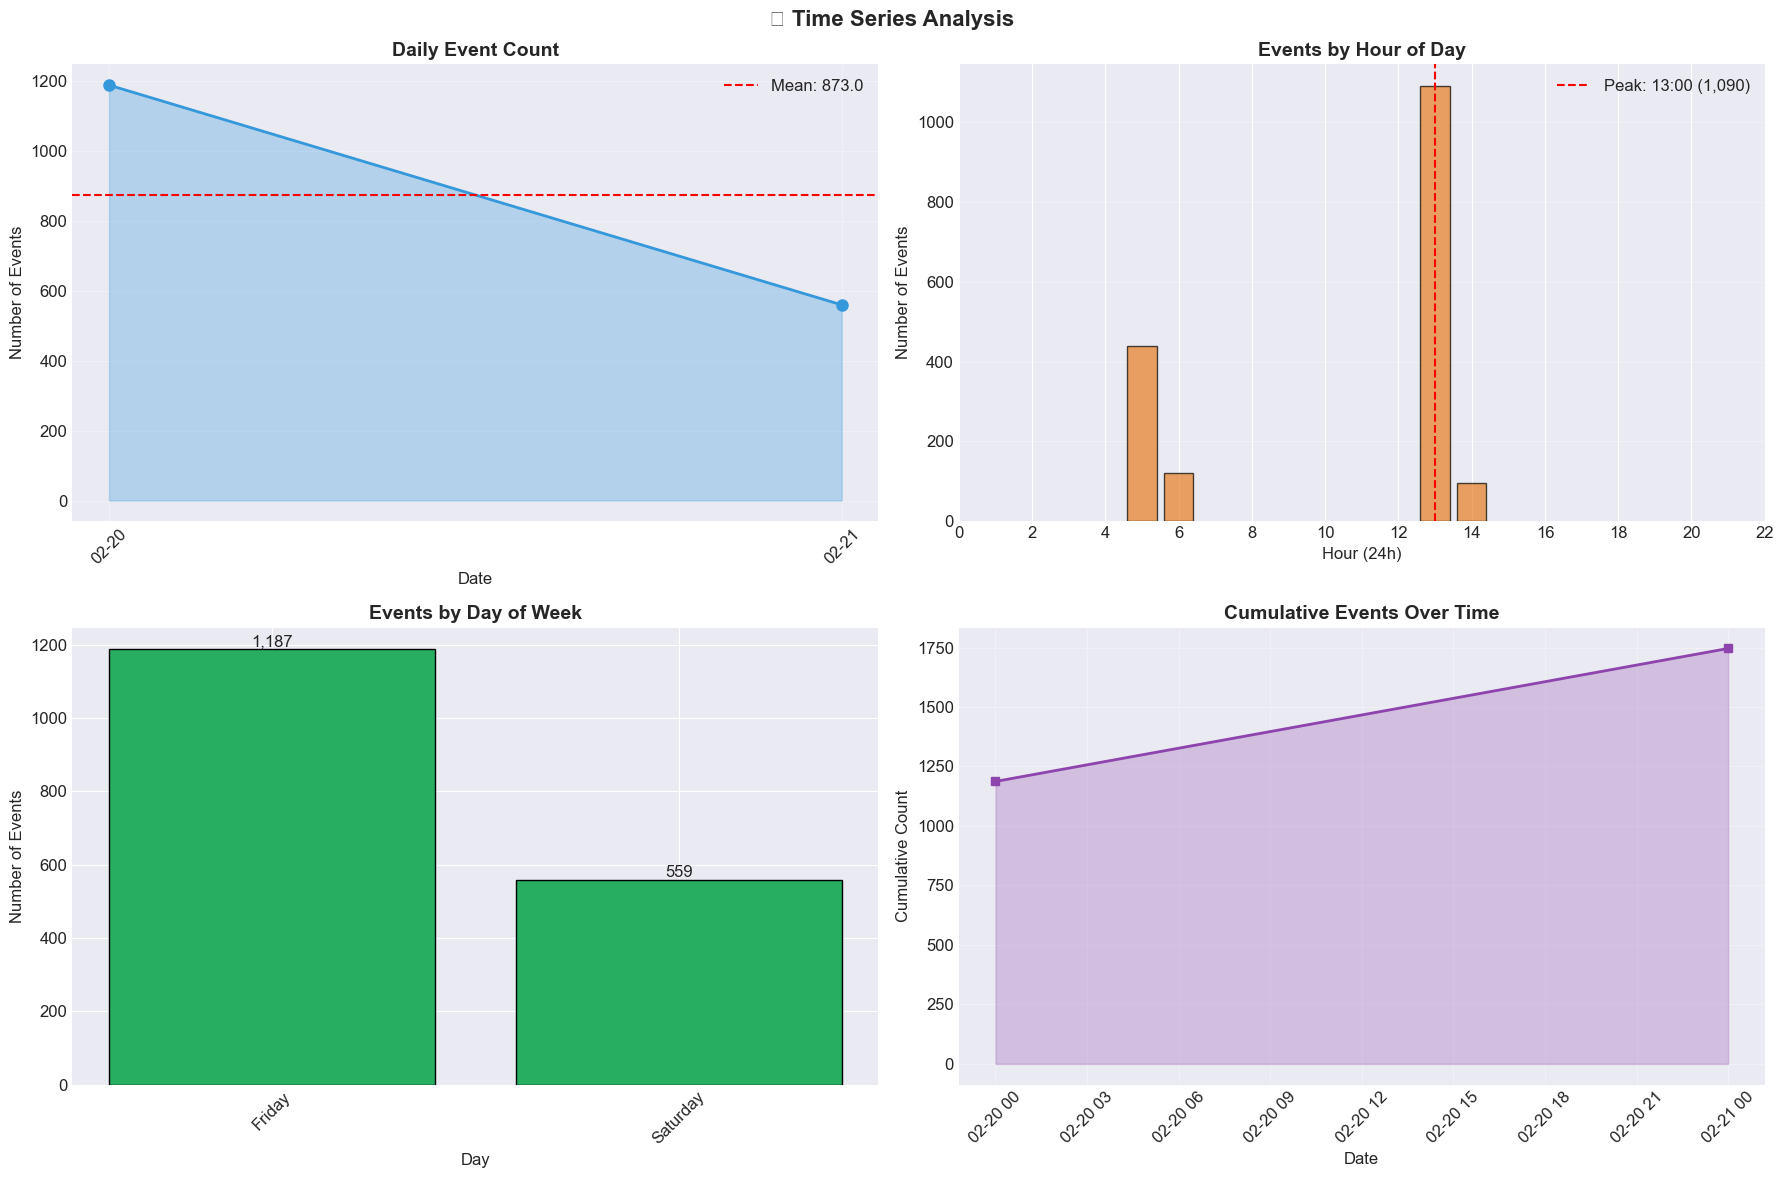


⏰ Peak Activity Times:
   • Busiest Hour: 13:00 (1,090 events)
   • Busiest Day: Friday (1,187 events)
   • Average Daily Events: 873.0


In [7]:

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('📈 Time Series Analysis', fontsize=16, fontweight='bold')

# 1. Daily Events Trend
ax1 = axes[0, 0]
daily_events = df.groupby('date').size()
ax1.plot(range(len(daily_events)), daily_events.values, 
         marker='o', linewidth=2, markersize=8, color='#3498db')
ax1.fill_between(range(len(daily_events)), daily_events.values, alpha=0.3, color='#3498db')
ax1.set_title('Daily Event Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Events')
ax1.set_xticks(range(0, len(daily_events), max(1, len(daily_events)//7)))
ax1.set_xticklabels([str(d)[5:] for d in daily_events.index[::max(1, len(daily_events)//7)]], 
                    rotation=45)
ax1.grid(True, alpha=0.3)
ax1.axhline(y=daily_events.mean(), color='red', linestyle='--', 
            label=f'Mean: {daily_events.mean():.1f}')
ax1.legend()

# 2. Hourly Pattern
ax2 = axes[0, 1]
hourly_events = df.groupby('hour').size()
bars2 = ax2.bar(hourly_events.index, hourly_events.values, 
                color='#e67e22', alpha=0.7, edgecolor='black')
ax2.set_title('Events by Hour of Day')
ax2.set_xlabel('Hour (24h)')
ax2.set_ylabel('Number of Events')
ax2.set_xticks(range(0, 24, 2))
ax2.grid(True, alpha=0.3, axis='y')
peak_hour = hourly_events.idxmax()
ax2.axvline(x=peak_hour, color='red', linestyle='--', 
            label=f'Peak: {peak_hour}:00 ({hourly_events.max():,})')
ax2.legend()

# 3. Day of Week Pattern
ax3 = axes[1, 0]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_events = df['day_of_week'].value_counts()
day_events = day_events.reindex([d for d in day_order if d in day_events.index])
bars3 = ax3.bar(day_events.index, day_events.values, color='#27ae60', edgecolor='black')
ax3.set_title('Events by Day of Week')
ax3.set_xlabel('Day')
ax3.set_ylabel('Number of Events')
ax3.tick_params(axis='x', rotation=45)
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# 4. Cumulative Events
ax4 = axes[1, 1]
daily_cumsum = daily_events.cumsum()
ax4.fill_between(daily_cumsum.index, daily_cumsum.values, alpha=0.3, color='#9b59b6')
ax4.plot(daily_cumsum.index, daily_cumsum.values, 
         marker='s', linewidth=2, color='#8e44ad')
ax4.set_title('Cumulative Events Over Time')
ax4.set_xlabel('Date')
ax4.set_ylabel('Cumulative Count')
ax4.tick_params(axis='x', rotation=45)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⏰ Peak Activity Times:")
print(f"   • Busiest Hour: {peak_hour}:00 ({hourly_events.max():,} events)")
print(f"   • Busiest Day: {day_events.idxmax()} ({day_events.max():,} events)")
print(f"   • Average Daily Events: {daily_events.mean():.1f}")


### 3.2 Severity Trends Over Time

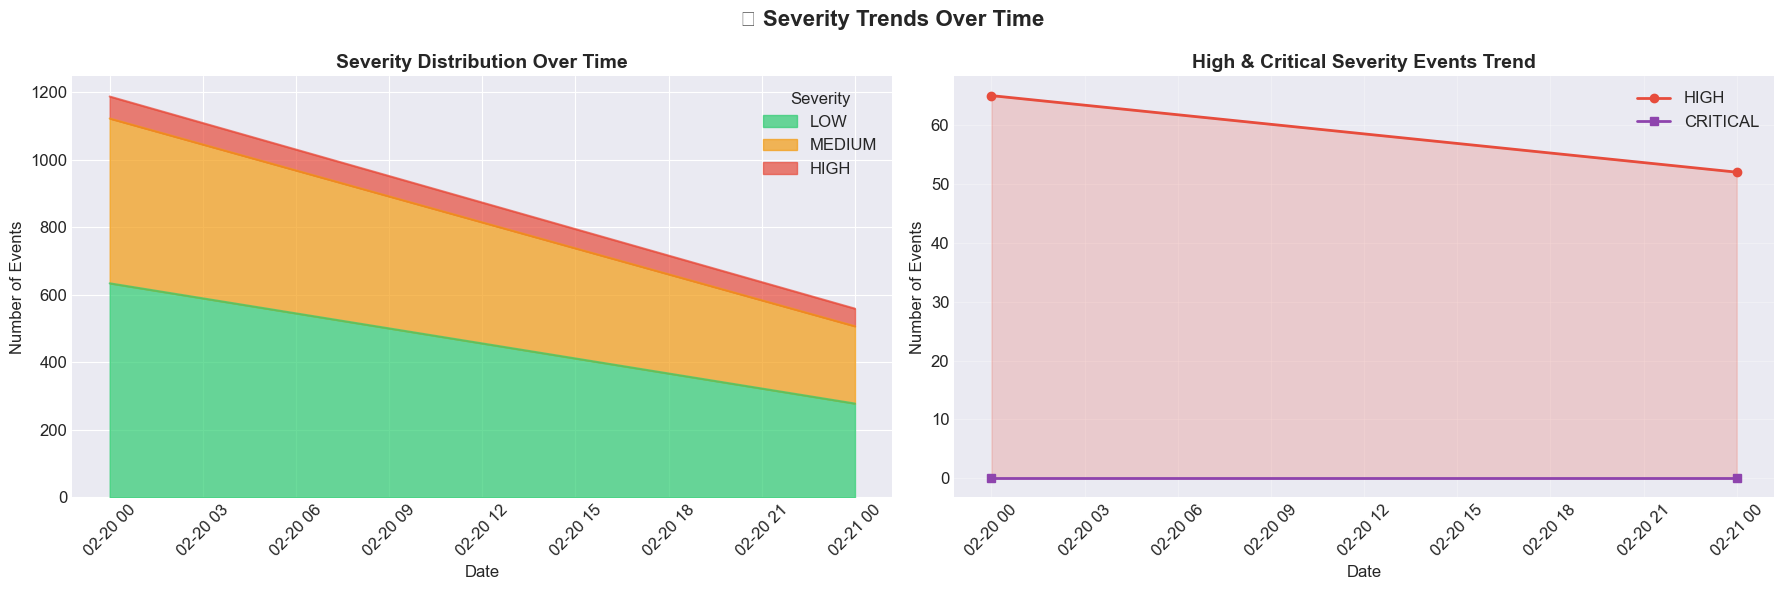

In [8]:

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('📊 Severity Trends Over Time', fontsize=16, fontweight='bold')

# 1. Stacked Area Chart
ax1 = axes[0]
severity_time = df.groupby(['date', 'severity']).size().unstack(fill_value=0)
severity_time = severity_time.reindex(columns=[s for s in severity_order if s in severity_time.columns])
severity_time.plot(kind='area', stacked=True, ax=ax1, alpha=0.7,
                   color=[severity_colors.get(s, '#3498db') for s in severity_time.columns])
ax1.set_title('Severity Distribution Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Events')
ax1.legend(title='Severity')
ax1.tick_params(axis='x', rotation=45)

# 2. High Severity Trend
ax2 = axes[1]
high_severity = severity_time['HIGH'] if 'HIGH' in severity_time.columns else pd.Series(0, index=severity_time.index)
critical_severity = severity_time['CRITICAL'] if 'CRITICAL' in severity_time.columns else pd.Series(0, index=severity_time.index)

ax2.plot(severity_time.index, high_severity.values, 
         marker='o', linewidth=2, color='#e74c3c', markersize=6, label='HIGH')
ax2.plot(severity_time.index, critical_severity.values, 
         marker='s', linewidth=2, color='#8e44ad', markersize=6, label='CRITICAL')
ax2.fill_between(severity_time.index, high_severity.values, alpha=0.2, color='#e74c3c')
ax2.fill_between(severity_time.index, critical_severity.values, alpha=0.2, color='#8e44ad')
ax2.set_title('High & Critical Severity Events Trend')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of Events')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()


## PART 4: INFRASTRUCTURE ANALYSIS
## ===============================

### 4.1 Host Distribution Analysis

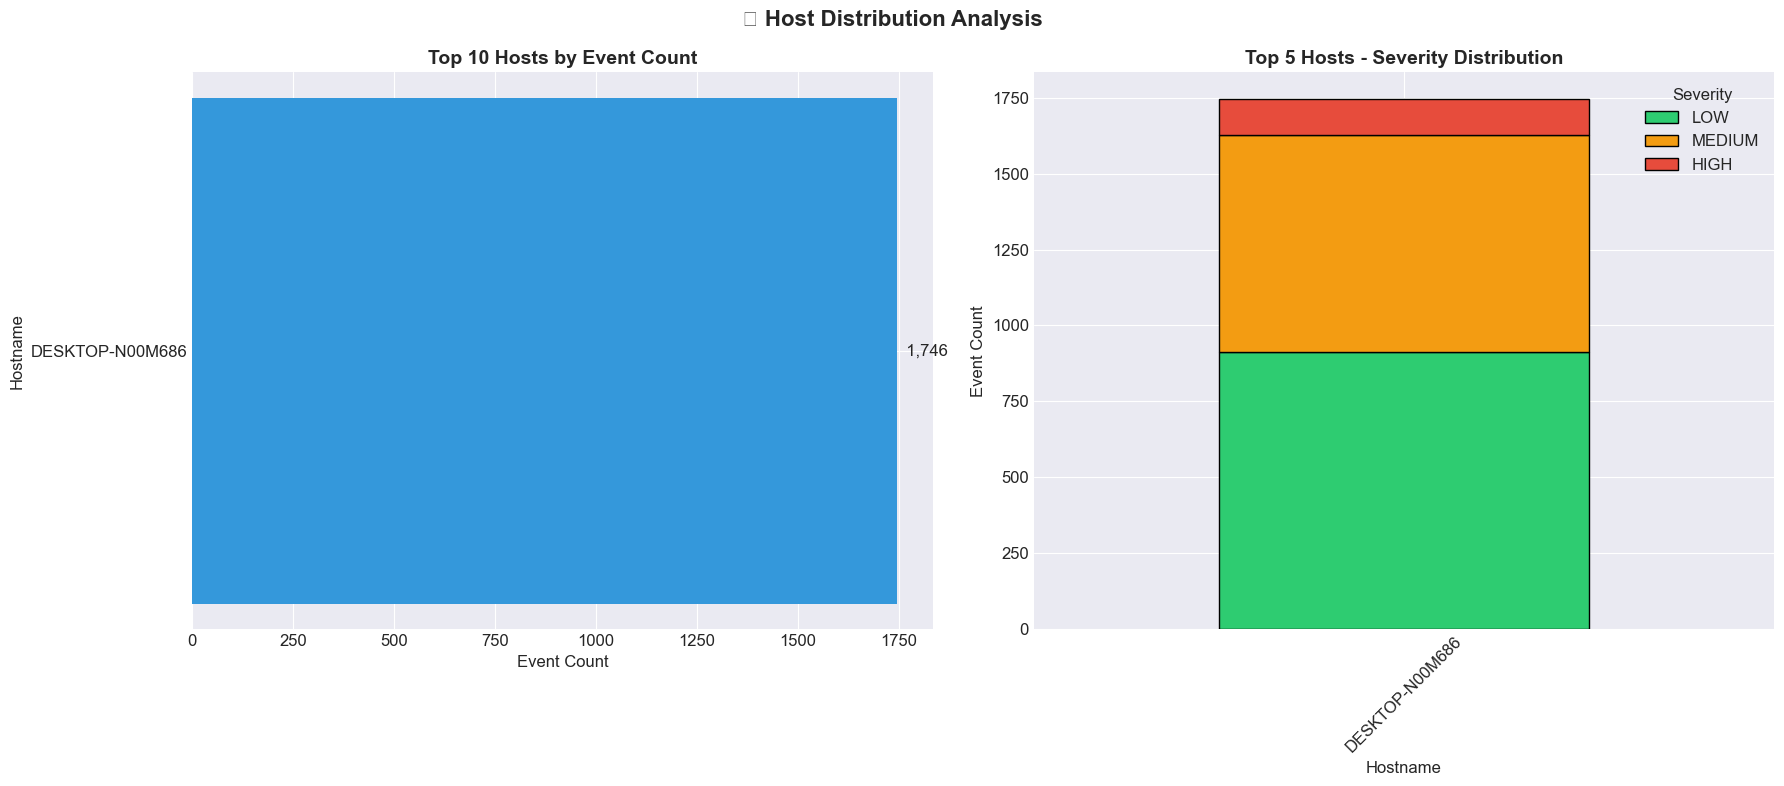


💻 Total Unique Hosts: 1


In [9]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('💻 Host Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Top 10 Hosts
ax1 = axes[0]
top_hosts = df['hostname'].value_counts().head(10)
bars1 = ax1.barh(range(len(top_hosts)), top_hosts.values, color='#3498db')
ax1.set_title('Top 10 Hosts by Event Count')
ax1.set_xlabel('Event Count')
ax1.set_ylabel('Hostname')
ax1.set_yticks(range(len(top_hosts)))
ax1.set_yticklabels(top_hosts.index)
for i, (bar, count) in enumerate(zip(bars1, top_hosts.values)):
    ax1.text(count, i, f'  {count:,}', va='center')

# 2. Host Activity by Severity
ax2 = axes[1]
host_severity = pd.crosstab(df['hostname'], df['severity'])
top_hosts_severity = host_severity.loc[top_hosts.index[:5]]
top_hosts_severity = top_hosts_severity.reindex(columns=[s for s in severity_order if s in top_hosts_severity.columns])
top_hosts_severity.plot(kind='bar', stacked=True, ax=ax2,
                        color=[severity_colors.get(s, '#3498db') for s in top_hosts_severity.columns],
                        edgecolor='black')
ax2.set_title('Top 5 Hosts - Severity Distribution')
ax2.set_xlabel('Hostname')
ax2.set_ylabel('Event Count')
ax2.legend(title='Severity')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print(f"\n💻 Total Unique Hosts: {df['hostname'].nunique():,}")


### 4.2 Operating System Analysis

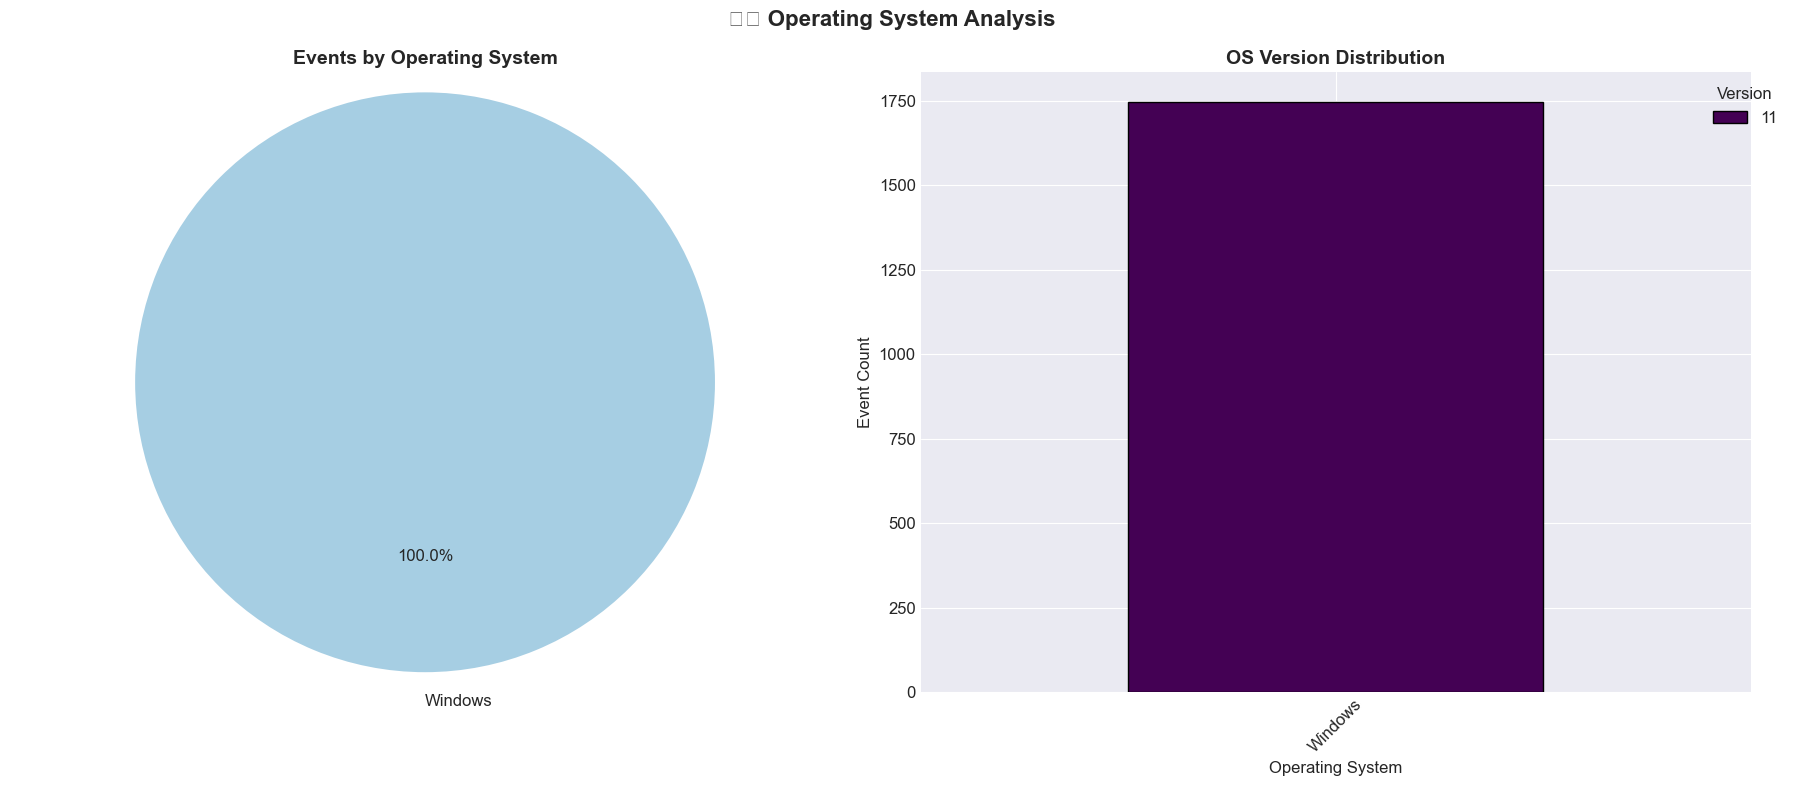

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('🖥️ Operating System Analysis', fontsize=16, fontweight='bold')

# 1. OS Distribution
ax1 = axes[0]
os_counts = df['os'].value_counts()
colors = plt.cm.Paired(range(len(os_counts)))
wedges, texts, autotexts = ax1.pie(os_counts.values, 
                                    labels=os_counts.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90)
ax1.set_title('Events by Operating System')
ax1.axis('equal')

# 2. OS by Version
ax2 = axes[1]
os_version = df.groupby(['os', 'os_version']).size().unstack(fill_value=0)
os_version.plot(kind='bar', stacked=True, ax=ax2, colormap='viridis', edgecolor='black')
ax2.set_title('OS Version Distribution')
ax2.set_xlabel('Operating System')
ax2.set_ylabel('Event Count')
ax2.legend(title='Version', bbox_to_anchor=(1.05, 1))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



### 4.3 Python Version Distribution


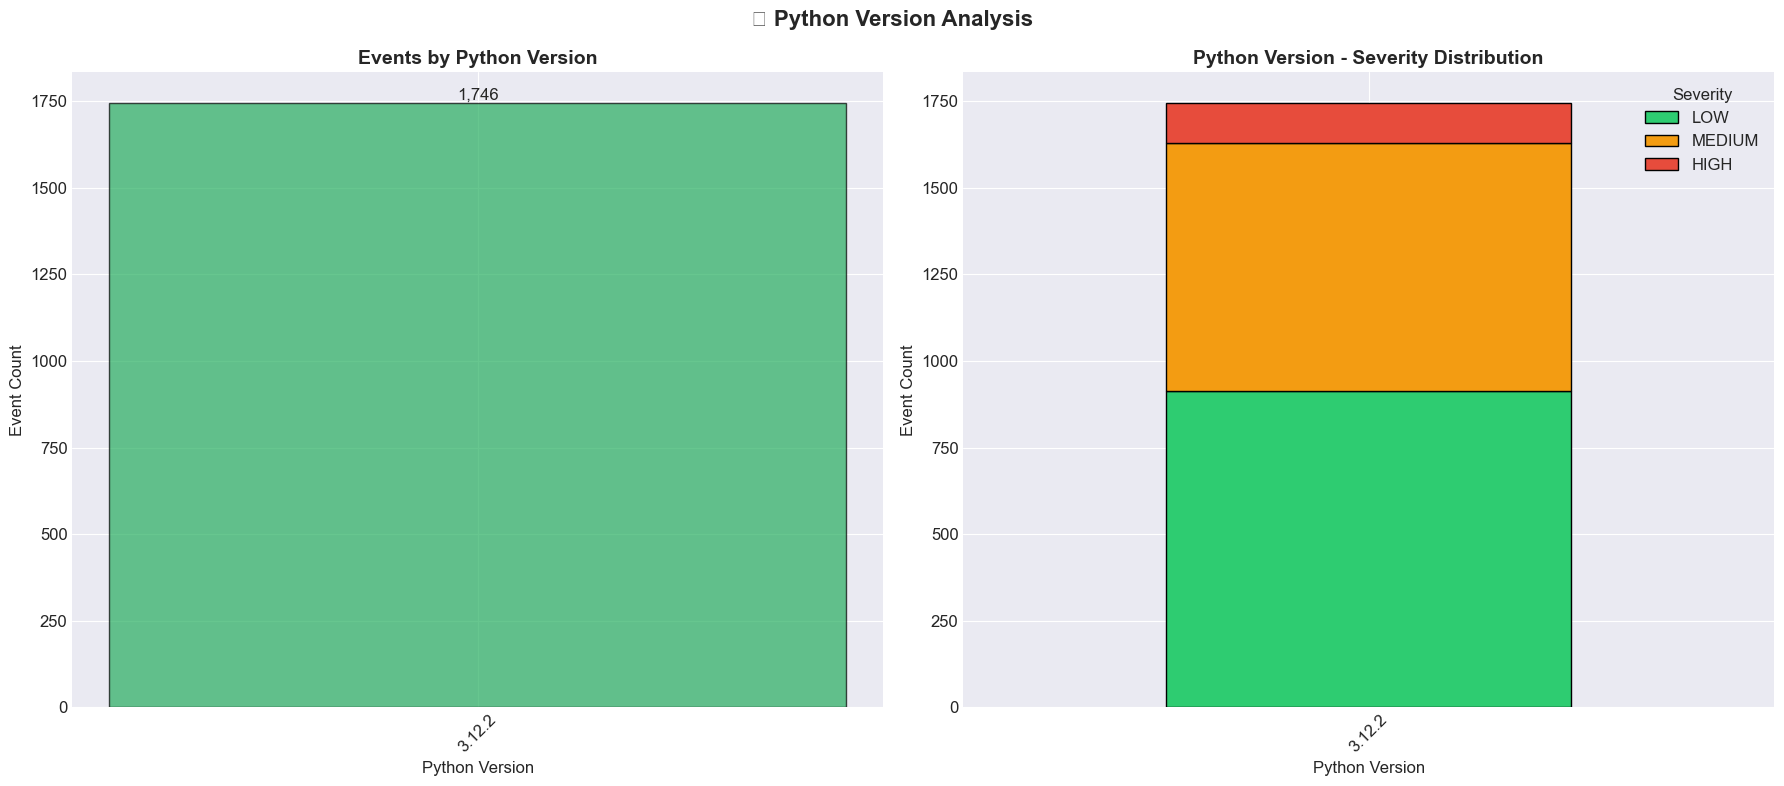

In [11]:

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('🐍 Python Version Analysis', fontsize=16, fontweight='bold')

# 1. Python Version Distribution
ax1 = axes[0]
python_counts = df['python_version'].value_counts().sort_index()
bars1 = ax1.bar(python_counts.index.astype(str), python_counts.values, 
                color='#27ae60', alpha=0.7, edgecolor='black')
ax1.set_title('Events by Python Version')
ax1.set_xlabel('Python Version')
ax1.set_ylabel('Event Count')
ax1.tick_params(axis='x', rotation=45)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom')

# 2. Python Version by Severity
ax2 = axes[1]
python_severity = pd.crosstab(df['python_version'], df['severity'])
python_severity = python_severity.reindex(columns=[s for s in severity_order if s in python_severity.columns])
python_severity.plot(kind='bar', stacked=True, ax=ax2,
                     color=[severity_colors.get(s, '#3498db') for s in python_severity.columns],
                     edgecolor='black')
ax2.set_title('Python Version - Severity Distribution')
ax2.set_xlabel('Python Version')
ax2.set_ylabel('Event Count')
ax2.legend(title='Severity')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




## PART 5: REQUEST ANALYSIS
## ========================


📨 Found 544 INCOMING_REQUEST events


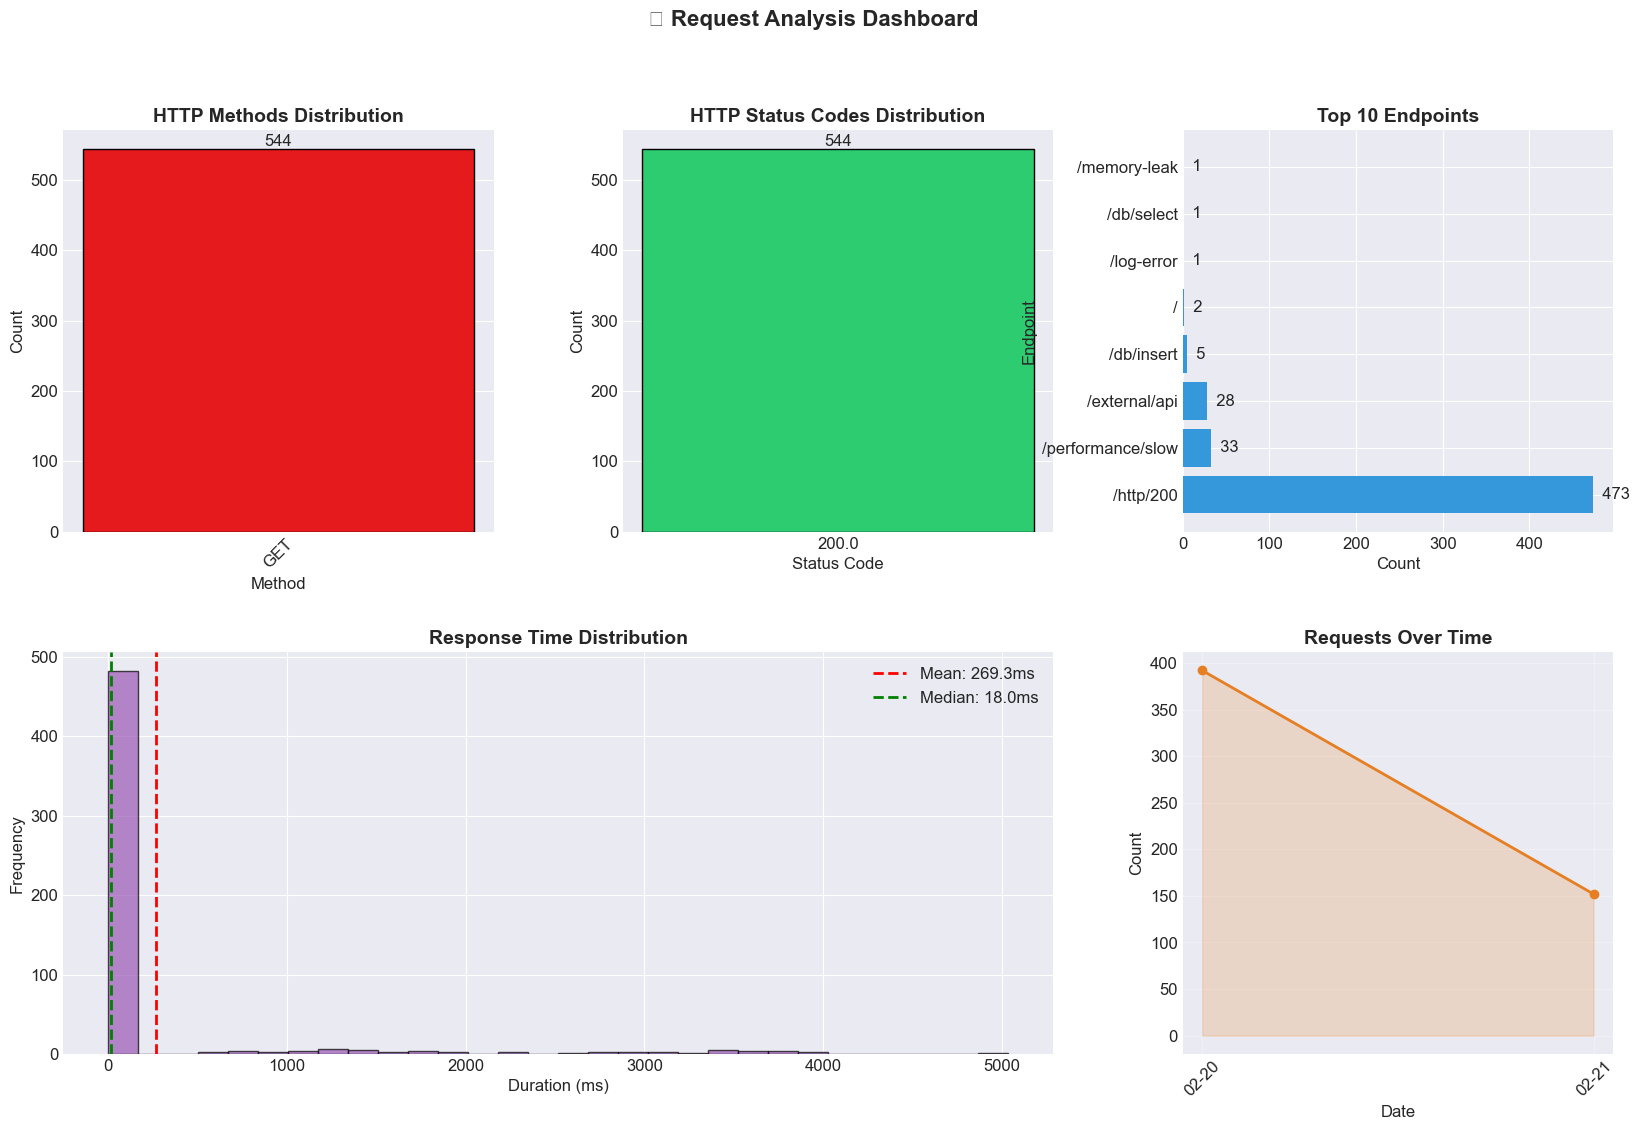


📊 Request Statistics:
   • Total Requests: 544
   • Average Response Time: 269.28ms
   • Success Rate (2xx): 100.0%
   • Error Rate (4xx/5xx): 0.0%


In [12]:

# Filter for request events
request_events = df[df['event_type'] == 'INCOMING_REQUEST'].copy()

if len(request_events) > 0:
    print(f"📨 Found {len(request_events):,} INCOMING_REQUEST events")
    
    fig = plt.figure(figsize=(20, 12))
    fig.suptitle('🌐 Request Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # Create subplot grid
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    # 1. HTTP Methods Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    method_counts = request_events['method'].value_counts()
    colors = plt.cm.Set1(range(len(method_counts)))
    bars1 = ax1.bar(method_counts.index, method_counts.values, color=colors, edgecolor='black')
    ax1.set_title('HTTP Methods Distribution')
    ax1.set_xlabel('Method')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    # 2. Status Codes Distribution
    ax2 = fig.add_subplot(gs[0, 1])
    status_counts = request_events['status_code'].value_counts().sort_index()
    colors = ['#2ecc71' if s < 400 else '#e74c3c' if s >= 500 else '#f39c12' 
              for s in status_counts.index]
    bars2 = ax2.bar(status_counts.index.astype(str), status_counts.values, 
                    color=colors, edgecolor='black')
    ax2.set_title('HTTP Status Codes Distribution')
    ax2.set_xlabel('Status Code')
    ax2.set_ylabel('Count')
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    # 3. Top Endpoints
    ax3 = fig.add_subplot(gs[0, 2])
    top_paths = request_events['path'].value_counts().head(10)
    bars3 = ax3.barh(range(len(top_paths)), top_paths.values, color='#3498db')
    ax3.set_title('Top 10 Endpoints')
    ax3.set_xlabel('Count')
    ax3.set_ylabel('Endpoint')
    ax3.set_yticks(range(len(top_paths)))
    ax3.set_yticklabels([p[:25] + '...' if len(p) > 25 else p for p in top_paths.index])
    for i, (bar, count) in enumerate(zip(bars3, top_paths.values)):
        ax3.text(count, i, f'  {count:,}', va='center')
    
    # 4. Response Time Distribution
    ax4 = fig.add_subplot(gs[1, :2])
    if request_events['duration_ms'].notna().any():
        request_events['duration_ms'].hist(bins=30, ax=ax4, edgecolor='black', 
                                           color='#9b59b6', alpha=0.7)
        ax4.set_title('Response Time Distribution')
        ax4.set_xlabel('Duration (ms)')
        ax4.set_ylabel('Frequency')
        ax4.axvline(request_events['duration_ms'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f"Mean: {request_events['duration_ms'].mean():.1f}ms")
        ax4.axvline(request_events['duration_ms'].median(), color='green', 
                   linestyle='--', linewidth=2, label=f"Median: {request_events['duration_ms'].median():.1f}ms")
        ax4.legend()
    
    # 5. Requests Over Time
    ax5 = fig.add_subplot(gs[1, 2])
    request_time = request_events.groupby(request_events['timestamp'].dt.date).size()
    ax5.plot(range(len(request_time)), request_time.values, 
             marker='o', linewidth=2, color='#e67e22', markersize=6)
    ax5.fill_between(range(len(request_time)), request_time.values, alpha=0.2, color='#e67e22')
    ax5.set_title('Requests Over Time')
    ax5.set_xlabel('Date')
    ax5.set_ylabel('Count')
    ax5.set_xticks(range(0, len(request_time), max(1, len(request_time)//5)))
    ax5.set_xticklabels([str(d)[5:] for d in request_time.index[::max(1, len(request_time)//5)]], 
                        rotation=45)
    ax5.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print request statistics
    print("\n📊 Request Statistics:")
    print(f"   • Total Requests: {len(request_events):,}")
    print(f"   • Average Response Time: {request_events['duration_ms'].mean():.2f}ms")
    print(f"   • Success Rate (2xx): {(request_events['status_code'] < 300).sum() / len(request_events) * 100:.1f}%")
    print(f"   • Error Rate (4xx/5xx): {(request_events['status_code'] >= 400).sum() / len(request_events) * 100:.1f}%")

else:
    print("📨 No INCOMING_REQUEST events found in the data")



## PART 6: ERROR ANALYSIS
## ======================



⚠️ Found 471 FAILURE events


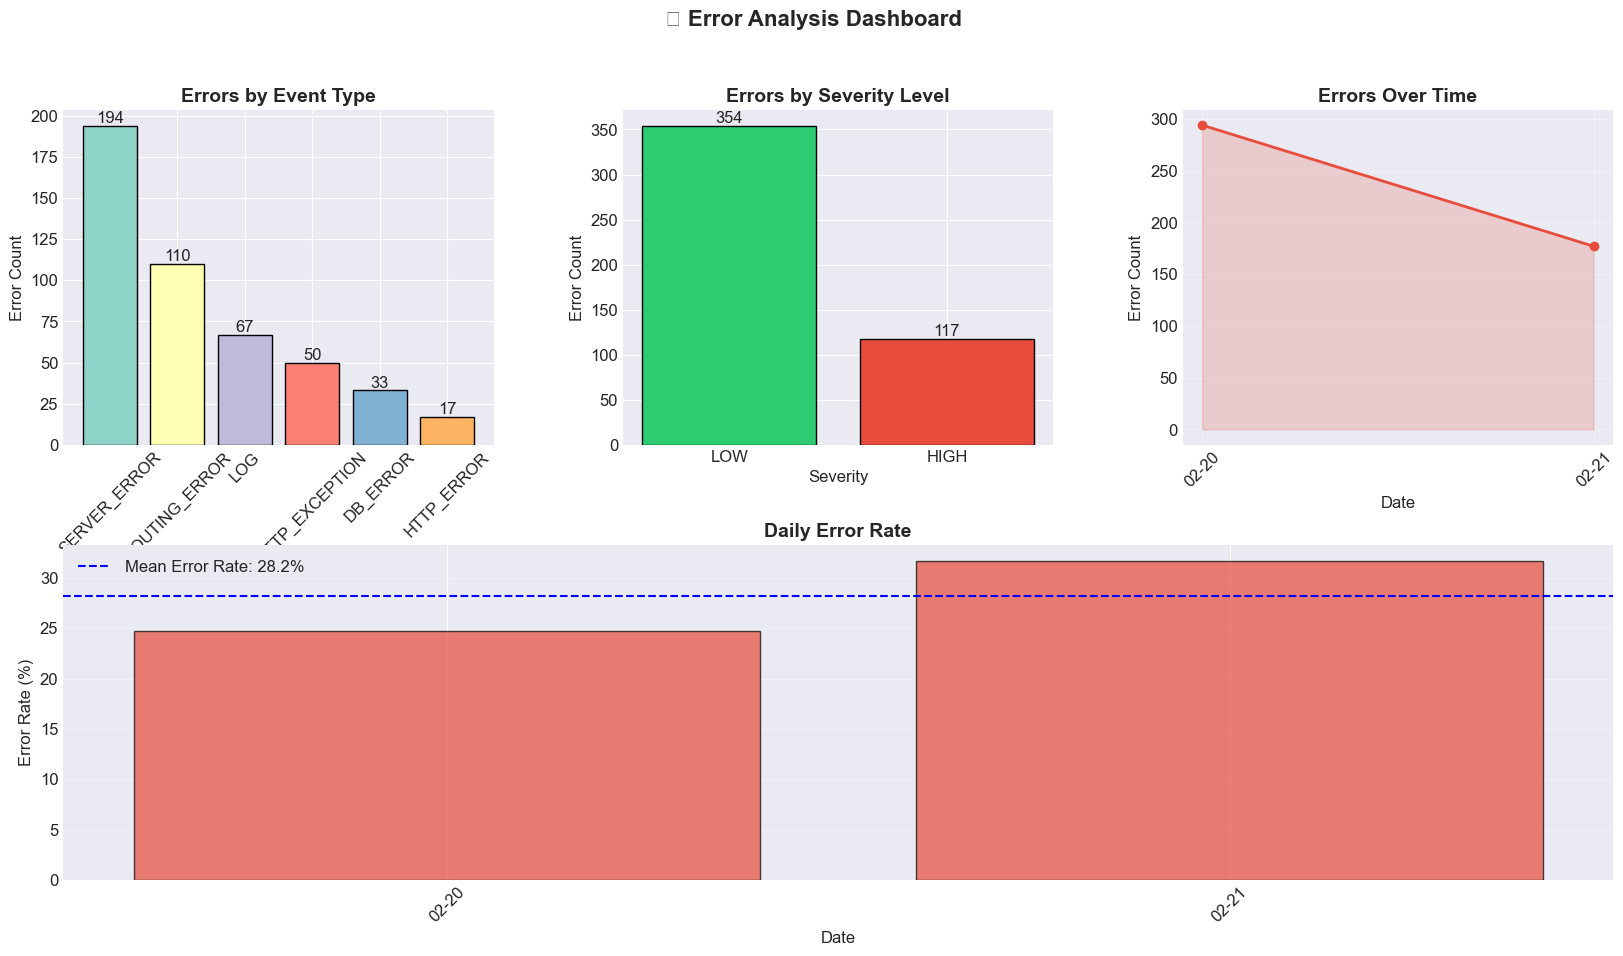


📊 Average Error Rate: 28.22%
📊 Peak Error Rate: 31.66%


In [13]:

# Filter for error events (FAILURE status)
error_events = df[df['status'] == 'FAILURE'].copy()

if len(error_events) > 0:
    print(f"⚠️ Found {len(error_events):,} FAILURE events")
    
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle('❌ Error Analysis Dashboard', fontsize=16, fontweight='bold')
    
    gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
    
    # 1. Errors by Event Type
    ax1 = fig.add_subplot(gs[0, 0])
    error_types = error_events['event_type'].value_counts()
    colors = plt.cm.Set3(range(len(error_types)))
    bars1 = ax1.bar(error_types.index, error_types.values, color=colors, edgecolor='black')
    ax1.set_title('Errors by Event Type')
    ax1.set_xlabel('Event Type')
    ax1.set_ylabel('Error Count')
    ax1.tick_params(axis='x', rotation=45)
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    # 2. Errors by Severity
    ax2 = fig.add_subplot(gs[0, 1])
    error_severity = error_events['severity'].value_counts()
    error_severity = error_severity.reindex([s for s in severity_order if s in error_severity.index])
    colors = [severity_colors.get(sev, '#3498db') for sev in error_severity.index]
    bars2 = ax2.bar(error_severity.index, error_severity.values, color=colors, edgecolor='black')
    ax2.set_title('Errors by Severity Level')
    ax2.set_xlabel('Severity')
    ax2.set_ylabel('Error Count')
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom')
    
    # 3. Error Timeline
    ax3 = fig.add_subplot(gs[0, 2])
    error_time = error_events.groupby(error_events['timestamp'].dt.date).size()
    ax3.plot(range(len(error_time)), error_time.values, 
             marker='o', linewidth=2, color='#e74c3c', markersize=6)
    ax3.fill_between(range(len(error_time)), error_time.values, alpha=0.2, color='#e74c3c')
    ax3.set_title('Errors Over Time')
    ax3.set_xlabel('Date')
    ax3.set_ylabel('Error Count')
    ax3.set_xticks(range(0, len(error_time), max(1, len(error_time)//5)))
    ax3.set_xticklabels([str(d)[5:] for d in error_time.index[::max(1, len(error_time)//5)]], 
                        rotation=45)
    ax3.grid(True, alpha=0.3)
    
    # 4. Error Rate Over Time
    ax4 = fig.add_subplot(gs[1, :])
    daily_total = df.groupby('date').size()
    daily_errors = error_events.groupby(error_events['timestamp'].dt.date).size()
    error_rate = (daily_errors / daily_total * 100).fillna(0)
    
    ax4.bar(range(len(error_rate)), error_rate.values, color='#e74c3c', alpha=0.7, edgecolor='black')
    ax4.set_title('Daily Error Rate')
    ax4.set_xlabel('Date')
    ax4.set_ylabel('Error Rate (%)')
    ax4.set_xticks(range(0, len(error_rate), max(1, len(error_rate)//7)))
    ax4.set_xticklabels([str(d)[5:] for d in error_rate.index[::max(1, len(error_rate)//7)]], 
                        rotation=45)
    ax4.axhline(y=error_rate.mean(), color='blue', linestyle='--', 
                label=f'Mean Error Rate: {error_rate.mean():.1f}%')
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Average Error Rate: {error_rate.mean():.2f}%")
    print(f"📊 Peak Error Rate: {error_rate.max():.2f}%")

else:
    print("✅ No FAILURE events found in the data")


 ## PART 7: CORRELATION ANALYSIS
 ## ============================


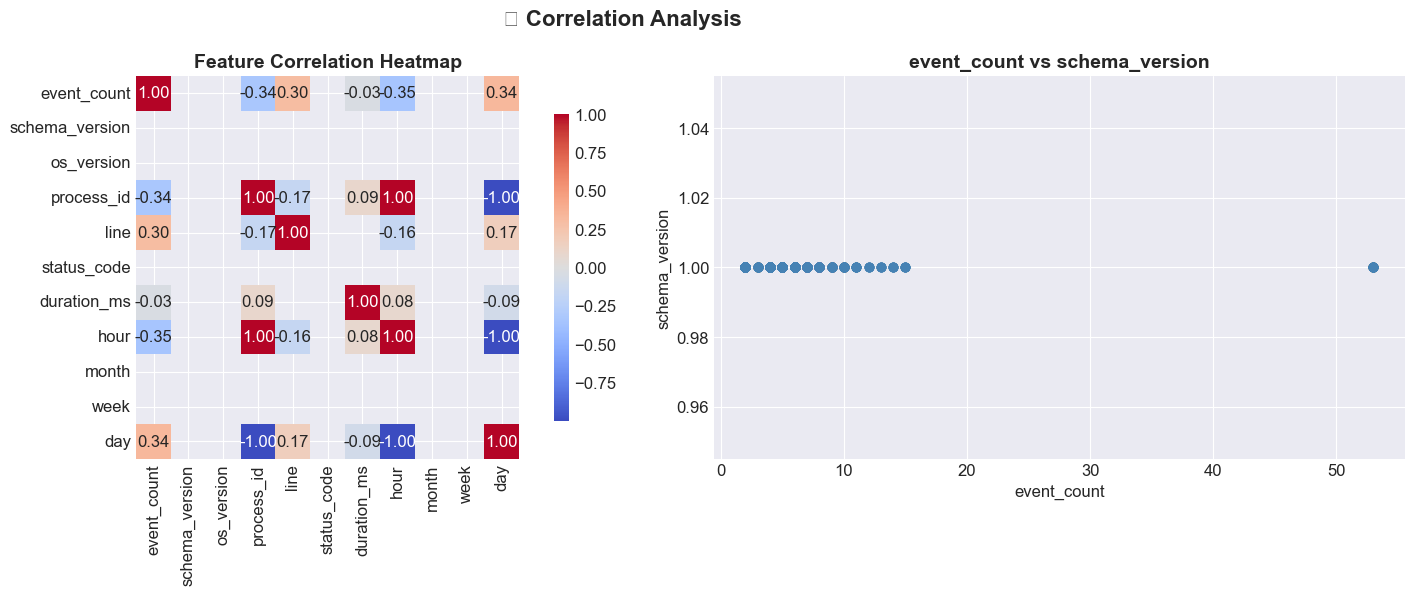

In [14]:

# Create correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) > 1:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('🔗 Correlation Analysis', fontsize=16, fontweight='bold')
    
    # 1. Correlation Heatmap
    ax1 = axes[0]
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, ax=ax1, fmt='.2f', cbar_kws={"shrink": 0.8})
    ax1.set_title('Feature Correlation Heatmap')
    
    # 2. Pairplot for selected columns (if not too many)
    ax2 = axes[1]
    selected_cols = numeric_cols[:min(4, len(numeric_cols))]
    if len(selected_cols) >= 2:
        for i, col1 in enumerate(selected_cols):
            for j, col2 in enumerate(selected_cols):
                if i < j:
                    ax2.scatter(df[col1], df[col2], alpha=0.5, c='steelblue')
                    ax2.set_xlabel(col1)
                    ax2.set_ylabel(col2)
                    ax2.set_title(f'{col1} vs {col2}')
                    break
            break
    
    plt.tight_layout()
    plt.show()



## PART 8: SUMMARY DASHBOARD
## =========================


### 8.1 Key Metrics Dashboard


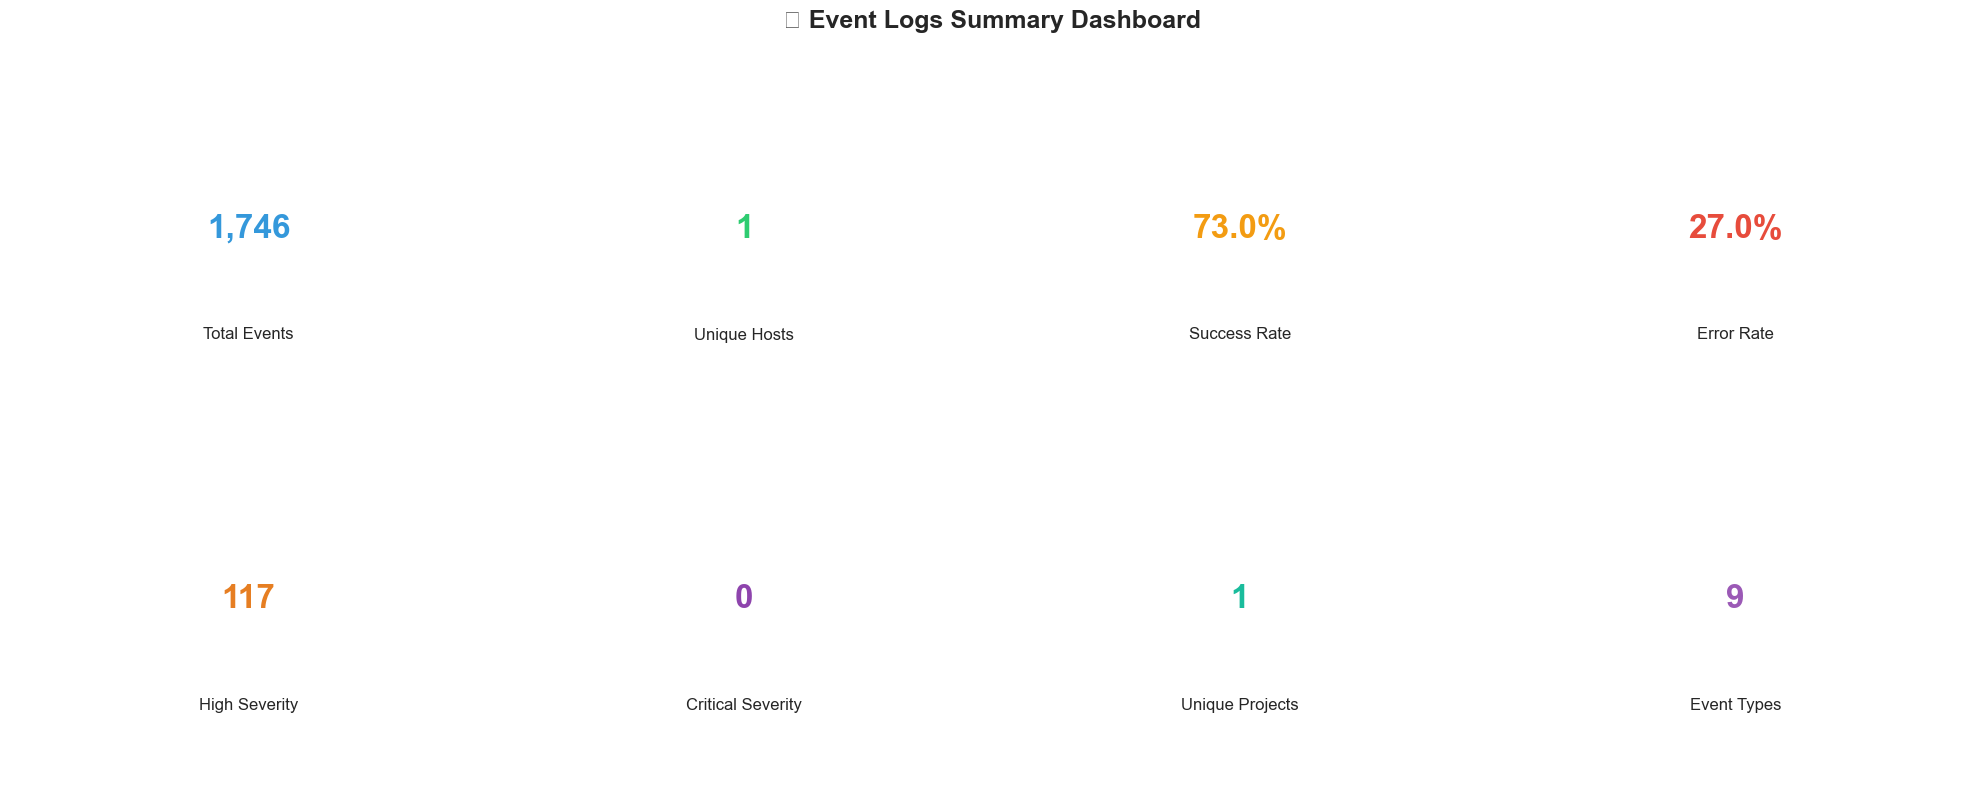

In [15]:

# Calculate key metrics
total_events = len(df)
unique_hosts = df['hostname'].nunique()
unique_projects = df['project'].nunique()
error_count = len(df[df['status'] == 'FAILURE'])
success_count = len(df[df['status'] == 'SUCCESS'])
high_severity = len(df[df['severity'] == 'HIGH'])
critical_severity = len(df[df['severity'] == 'CRITICAL'])
success_rate = (success_count / total_events * 100) if total_events > 0 else 0

# Create metrics dashboard
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
fig.suptitle('📊 Event Logs Summary Dashboard', fontsize=18, fontweight='bold')

metrics = [
    (total_events, 'Total Events', '#3498db'),
    (unique_hosts, 'Unique Hosts', '#2ecc71'),
    (f'{success_rate:.1f}%', 'Success Rate', '#27ae60' if success_rate > 90 else '#f39c12'),
    (f'{100-success_rate:.1f}%', 'Error Rate', '#e74c3c'),
    (high_severity, 'High Severity', '#e67e22'),
    (critical_severity, 'Critical Severity', '#8e44ad'),
    (unique_projects, 'Unique Projects', '#1abc9c'),
    (df['event_type'].nunique(), 'Event Types', '#9b59b6')
]

for idx, (value, label, color) in enumerate(metrics):
    row = idx // 4
    col = idx % 4
    ax = axes[row, col]
    ax.text(0.5, 0.5, f'{value:,}' if isinstance(value, (int, float)) else value, 
            ha='center', va='center', fontsize=24, fontweight='bold', color=color)
    ax.text(0.5, 0.2, label, ha='center', va='center', fontsize=12)
    ax.axis('off')
    
    # Add a colored border
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color(color)
        spine.set_linewidth(2)

plt.tight_layout()
plt.show()


 ### 8.2 Final Insights and Recommendations


In [16]:
print("=" * 70)
print("🔍 FINAL INSIGHTS AND RECOMMENDATIONS")
print("=" * 70)

# Calculate key metrics properly
total_events = len(df)
unique_hosts = df['hostname'].nunique()
unique_projects = df['project'].nunique()
error_count = len(df[df['status'] == 'FAILURE'])
success_count = len(df[df['status'] == 'SUCCESS'])
high_severity = len(df[df['severity'] == 'HIGH'])
critical_severity = len(df[df['severity'] == 'CRITICAL'])

# Calculate rates as single values (not Series)
success_rate = (success_count / total_events * 100) if total_events > 0 else 0
error_rate = (error_count / total_events * 100) if total_events > 0 else 0

# Overall statistics
print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total Events Analyzed: {total_events:,}")
print(f"   • Time Period: {df['timestamp'].min().date()} to {df['timestamp'].max().date()}")
print(f"   • Total Duration: {(df['timestamp'].max() - df['timestamp'].min()).days} days")

# Event composition
print(f"\n📊 EVENT COMPOSITION:")
for event_type in df['event_type'].unique():
    count = len(df[df['event_type'] == event_type])
    pct = count / len(df) * 100
    print(f"   • {event_type}: {count:,} ({pct:.1f}%)")

# System health metrics
print(f"\n📊 SYSTEM HEALTH METRICS:")
print(f"   • Success Rate: {success_rate:.2f}%")
print(f"   • Error Rate: {error_rate:.2f}%")
print(f"   • High/Critical Severity: {high_severity + critical_severity:,} ({(high_severity + critical_severity)/len(df)*100:.1f}%)")

# Infrastructure summary
print(f"\n📊 INFRASTRUCTURE SUMMARY:")
print(f"   • Active Hosts: {unique_hosts:,}")
print(f"   • Operating Systems: {df['os'].nunique()}")
print(f"   • Python Versions: {df['python_version'].nunique()}")

# Top findings
print(f"\n🔍 TOP FINDINGS:")
print(f"   • Most Active Host: {df['hostname'].mode()[0]}")
print(f"   • Peak Activity Hour: {int(df.groupby('hour').size().idxmax())}:00")
print(f"   • Most Common Event Type: {df['event_type'].mode()[0]}")
print(f"   • Most Common Severity: {df['severity'].mode()[0]}")

# Recommendations based on findings
print(f"\n💡 RECOMMENDATIONS:")
recommendations = []

if error_rate > 10:
    recommendations.append("⚠️ High error rate detected - Investigate failure patterns immediately")
if high_severity + critical_severity > total_events * 0.1:
    recommendations.append("⚠️ Many high/critical severity events - Prioritize error fixing")
if success_rate < 90:
    recommendations.append("⚠️ Success rate below 90% - Review system stability and error handling")
if df['event_type'].nunique() < 3:
    recommendations.append("ℹ️ Limited event types - Consider adding more granular logging")
if df['os'].nunique() < 2:
    recommendations.append("ℹ️ Single OS environment - Monitor for OS-specific issues")

# Check if there are any LOG events with ERROR level
if 'LOG' in df['event_type'].values:
    log_errors = df[(df['event_type'] == 'LOG') & (df['level'] == 'ERROR')]
    if len(log_errors) > 10:
        recommendations.append("⚠️ Multiple error logs detected - Check application error patterns")

# Check request performance if available
if 'INCOMING_REQUEST' in df['event_type'].values:
    request_events = df[df['event_type'] == 'INCOMING_REQUEST']
    avg_duration = request_events['duration_ms'].mean()
    if pd.notna(avg_duration) and avg_duration > 1000:
        recommendations.append("⚠️ High average response time - Optimize API endpoints")

if not recommendations:
    recommendations.append("✅ System appears healthy - Continue monitoring and maintain current practices")

for i, rec in enumerate(recommendations, 1):
    print(f"   {i}. {rec}")

print("\n" + "=" * 70)
print("✅ ANALYSIS COMPLETE")
print("=" * 70)

🔍 FINAL INSIGHTS AND RECOMMENDATIONS

📊 DATASET OVERVIEW:
   • Total Events Analyzed: 1,746
   • Time Period: 2026-02-20 to 2026-02-21
   • Total Duration: 0 days

📊 EVENT COMPOSITION:
   • LOG: 69 (4.0%)
   • INCOMING_REQUEST: 544 (31.2%)
   • SERVER_ERROR: 194 (11.1%)
   • DB_QUERY: 717 (41.1%)
   • HTTP_EXCEPTION: 50 (2.9%)
   • ROUTING_ERROR: 110 (6.3%)
   • HTTP_CALL: 12 (0.7%)
   • DB_ERROR: 33 (1.9%)
   • HTTP_ERROR: 17 (1.0%)

📊 SYSTEM HEALTH METRICS:
   • Success Rate: 73.02%
   • Error Rate: 26.98%
   • High/Critical Severity: 117 (6.7%)

📊 INFRASTRUCTURE SUMMARY:
   • Active Hosts: 1
   • Operating Systems: 1
   • Python Versions: 1

🔍 TOP FINDINGS:
   • Most Active Host: DESKTOP-N00M686
   • Peak Activity Hour: 13:00
   • Most Common Event Type: DB_QUERY
   • Most Common Severity: LOW

💡 RECOMMENDATIONS:
   1. ⚠️ High error rate detected - Investigate failure patterns immediately
   2. ⚠️ Success rate below 90% - Review system stability and error handling
   3. ℹ️ Single OS

### 8.3 Export Processed Data

In [17]:

# Export summary statistics to JSON
summary_stats = {
    'total_events': int(total_events),
    'unique_hosts': int(unique_hosts),
    'unique_projects': int(unique_projects),
    'success_rate': float(success_rate),
    'error_rate': float(100 - success_rate),
    'high_severity_count': int(high_severity),
    'critical_severity_count': int(critical_severity),
    'date_range_start': str(df['timestamp'].min()),
    'date_range_end': str(df['timestamp'].max()),
    'most_active_host': str(df['hostname'].mode()[0]),
    'peak_hour': int(df.groupby('hour').size().idxmax()),
    'event_types': df['event_type'].unique().tolist()
}

# Save to file (optional - Kaggle notebooks have temporary storage)
import json
with open('analysis_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)
print("✅ Analysis summary saved to 'analysis_summary.json'")

# Display final message
print("\n🎉 All visualizations completed successfully!")
print("📁 You can find the processed data and summary in the output files.")

✅ Analysis summary saved to 'analysis_summary.json'

🎉 All visualizations completed successfully!
📁 You can find the processed data and summary in the output files.
